In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Delivery = pd.read_csv("/content/delivery_time.csv")
Delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
Delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# There are no Null Values in the data set

In [7]:
Delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
Delivery['Delivery Time'].value_counts()

16.68    1
19.83    1
13.50    1
19.75    1
24.00    1
29.00    1
19.00    1
9.50     1
18.75    1
10.75    1
15.35    1
14.88    1
11.50    1
13.75    1
8.00     1
12.03    1
21.50    1
18.11    1
17.90    1
17.83    1
21.00    1
Name: Delivery Time, dtype: int64

In [9]:
# We can clearly see that all the observations are unique as the value count for each is one.

In [10]:
Delivery['Delivery Time'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [11]:
# From the above we observed  that the variable is continuous.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


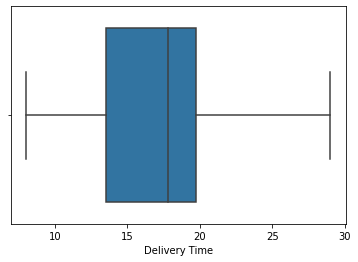

In [13]:
# Data Visulaization through Box-Plot Representation
sns.boxplot(Delivery['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


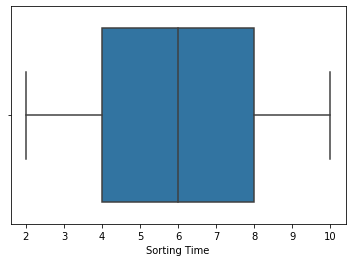

In [14]:
sns.boxplot(Delivery['Sorting Time'])

In [15]:
# No outliers are present in the Data set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


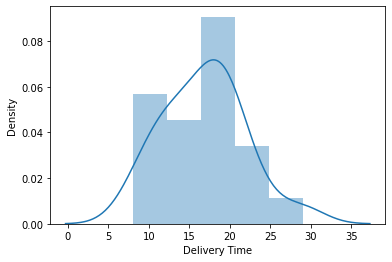

In [16]:
# Data visualization through  distplot representation
sns.distplot(Delivery['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


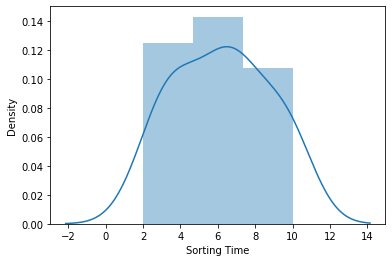

In [17]:
sns.distplot(Delivery['Sorting Time'])

In [18]:
# From the distplot of the variable-Delivery Time we can see that the Data is negatively skewed
# And the distplot of the variable- Sorting Time indicates that the almost it's following the Gaussian distribution.

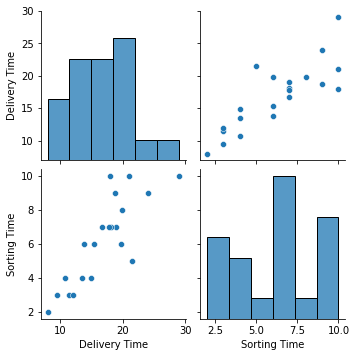

In [19]:
sns.pairplot(Delivery)

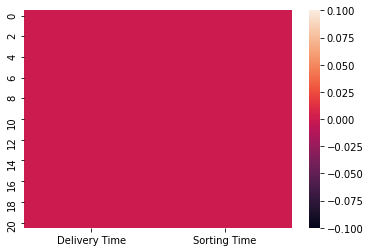

In [20]:
# HeatMap
# HeatMap representation of the data
sns.heatmap(Delivery.isnull())

In [21]:
# From the above Heat Map we concluded that there is no Missing Values in the Data Set

In [22]:
# Correlation
Delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


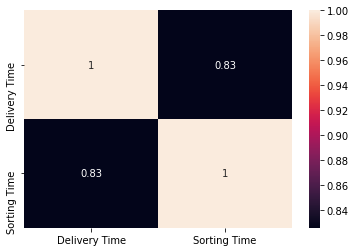

In [26]:
# Correlation through  Heat Map representation
sns.heatmap(Delivery.corr(), annot = True)

In [27]:
# From the above correlation we concluded that there is a positive correlation
# And the accuracy of the correlation between both the variable is 83% which is less. 

In [46]:
# Renaming the variables
Rename1 = Delivery.rename(columns={'Delivery Time':'Delivery_Time'})
Rename2 = Rename1.rename(columns={'Sorting Time' : 'Sorting_Time'})
Rename2

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [49]:
# MODEL BUILDING

Model1 = smf.ols('Delivery_Time~Sorting_Time',Rename2).fit()
Model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        10:09:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# R-squared and adjusted R-Squared Values
(Model1.rsquared, Model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [51]:
Model1.pvalues # P-Values

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [52]:
Model1.tvalues # T-Values

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [53]:
# COEFFICIENT
Model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

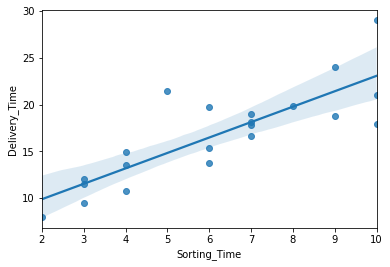

In [55]:
sns.regplot(x="Sorting_Time", y="Delivery_Time",data=Rename2)

In [62]:
# PREDICTION
# In order to predict the delivery time we have created a series of sorting time
Data = pd.Series([12, 14, 16, 18, 20])
Data

0    12
1    14
2    16
3    18
4    20
dtype: int64

In [61]:
Data1 = pd.DataFrame(Data, columns = ['Sorting_Time'])
Data1

,Sorting_Time
0,12
1,14
2,16
3,18
4,20


In [63]:
Model1.predict(Data1)

0    26.370973
1    29.669013
2    32.967052
3    36.265092
4    39.563132
dtype: float64

In [ ]:
# The above prediction shows that for Sorting Time 12, 14, 16, 18, 20 the DeliveryTime is 26.370973, 29.669013, 32.967052, 36.265092, 39.563132 respectively